Populating the interactive namespace from numpy and matplotlib


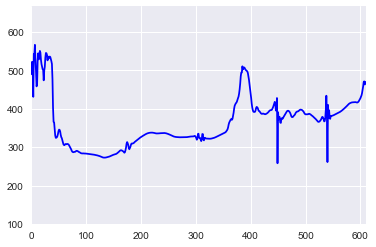

In [10]:
%pylab inline
%matplotlib inline
    
import pywt
import numpy as np
import seaborn
from statsmodels.robust import mad
import matplotlib.pyplot as plt  
import sys
import pandas as pd
import datetime

def read(filePath):
    '''
    read data 2 dict
    '''
    data = pd.read_csv(filePath)
    
    data['week'] = data['record_date'].apply(lambda x:datetime.datetime.strptime(x,'%Y/%m/%d').weekday())
    data['month'] = data['record_date'].apply(lambda x:datetime.datetime.strptime(x,'%Y/%m/%d').month)
    data['day'] = data['record_date'].apply(lambda x:datetime.datetime.strptime(x,'%Y/%m/%d').day)
    
    data['power_consumption']
    #print data
    return data
            
def waveletSmooth( x, wavelet="db4", level=1, title=None ):
    # calculate the wavelet coefficients
    coeff = pywt.wavedec( x, wavelet, mode="per" )
    # calculate a threshold
    sigma = mad( coeff[-level] )
    # changing this threshold also changes the behavior,
    # but I have not played with this very much
    uthresh = sigma * np.sqrt( 2*np.log( len( x ) ) )
    coeff[1:] = ( pywt.threshold( i, value=uthresh, mode="soft" ) for i in coeff[1:] )
    # reconstruct the signal using the thresholded coefficients
    y = pywt.waverec( coeff, wavelet, mode="per" )
    f, ax = plt.subplots()
    plt.plot( x, color="b", alpha=0.5 )
    plt.plot( y, color="b" )
    if title:
        ax.set_title(title)
    ax.set_xlim((0,len(y)))
    
    
data = read("./data/Tianchi_power.csv")
waveletSmooth(data[data.user_id==365]['power_consumption'])


#todo 识别突变点

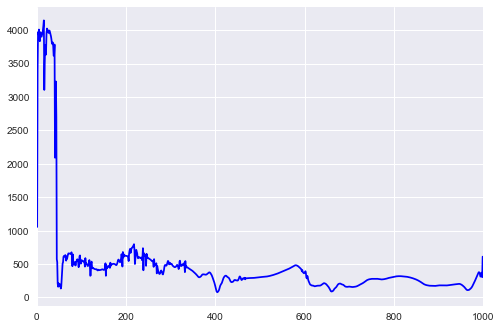